# Problem Statement

Given the MAGIC gamma telescope dataset that can be obtained using this Link.  This datasetis generated to simulate registration of high energy gamma particles in a ground-based atmo-spheric Cherenkov gamma telescope using the imaging technique.  The dataset consists of two classes; gammas (signal) and hadrons (background).  There are 12332 gamma events and 6688 hadron  events.   You  are  required  to  use  this  dataset  to  apply  different  classification  models such as Decision Trees, Naıve Bayes Classifier, Random Forests, AdaBoost and K-Nearest Neighbor (K-NN). You are also required to tune the parameters of these models, and compare the performance of models with each other.


## Attribute Information:

1. fLength: continuous # major axis of ellipse [mm]
2. fWidth: continuous # minor axis of ellipse [mm]
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
5. fConc1: continuous # ratio of highest pixel over fSize [ratio]
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
7. fM3Long: continuous # 3rd root of third moment along major axis [mm]
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
9. fAlpha: continuous # angle of major axis with vector to origin [deg]
10. fDist: continuous # distance from origin to center of ellipse [mm]
11. class: g,h # gamma (signal), hadron (background)

g = gamma (signal): 12332
h = hadron (background): 6688 

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Importing the Dataset

In [2]:
# Adding column names
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
# Importing the dataset
df = pd.read_csv('magic04.data',names = col_names)
#df = df.sample(frac = 1)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
print(df['class'].value_counts())
df.describe()

g    12332
h     6688
Name: class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


## Data Balancing

In [4]:
# Splitting dataset  by class label
df_g = df[df['class'] == 'g']
df_h = df[df['class'] == 'h']
df_g

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
12327,12.8703,11.4444,2.3811,0.7360,0.3805,-15.0946,5.3032,11.6208,21.0120,204.0370,g
12328,26.8595,20.5946,2.8754,0.3438,0.2152,-3.4556,-20.0014,-9.0535,3.9848,205.4980,g
12329,22.0913,10.8949,2.2945,0.5381,0.2919,15.2776,18.2296,7.3975,21.0680,123.2810,g
12330,56.2216,18.7019,2.9297,0.2516,0.1393,96.5758,-41.2969,11.3764,5.9110,197.2090,g


In [5]:
# Balancing Data
#dfbalanced_g = df_g.sample(df_h.shape[0])
dfbalanced_g = df_g[:df_h.shape[0]]
df = pd.concat([dfbalanced_g, df_h], axis=0) # concatenate horizontally
df['class'].value_counts()

g    6688
h    6688
Name: class, dtype: int64

In [6]:
# Separating features and class
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y

array(['g', 'g', 'g', ..., 'h', 'h', 'h'], dtype=object)

## Encoding class labels

In [7]:
# Encoding the Dependent Variable(y)
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 1 1 1]


## Splitting Dataset into Train set and Test set

In [12]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2999, random_state = 0,stratify=y)
print(f"Train set size: {X_train.shape[0]}\nTest set size: {X_test.shape[0]}")
print(Counter(y_train))
print(Counter(y_test))

Train set size: 9364
Test set size: 4012
Counter({1: 4682, 0: 4682})
Counter({0: 2006, 1: 2006})


## Feature Scaling

In [13]:
# for KNN as it is based upon distances
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)
print(X_train)
print(X_test)

[[0.03866115 0.05030969 0.11402557 ... 0.51384336 0.61213889 0.33926103]
 [0.1060195  0.04611322 0.19295707 ... 0.46895876 0.85389222 0.47096393]
 [0.18285673 0.10055191 0.41621442 ... 0.52365604 0.03552222 0.34721202]
 ...
 [0.0334423  0.03998955 0.11643753 ... 0.46984637 0.58271778 0.44295361]
 [0.0832623  0.05837851 0.13835625 ... 0.45035779 0.89218333 0.14212638]
 [0.04340349 0.02731705 0.01112518 ... 0.47108938 0.25136667 0.28382466]]
[[0.18817527 0.08000094 0.27695369 ... 0.45629629 0.10407333 0.30876203]
 [0.1695148  0.08601579 0.41292812 ... 0.519218   0.02028444 0.42572647]
 [0.25432159 0.11695868 0.41983237 ... 0.55411699 0.04223333 0.52288427]
 ...
 [0.05586736 0.06523547 0.14363242 ... 0.44734942 0.52550222 0.31418812]
 [0.067696   0.06311442 0.16374216 ... 0.51332161 0.43543333 0.33746447]
 [0.05231504 0.0401678  0.13262783 ... 0.47074563 0.02010222 0.49621104]]


## Model Creation and Evaluation Functions

In [14]:
# Model Creation
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score,recall_score,precision_score
def train_model(X_train, X_test, y_train, classifier):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    return pred


In [15]:
comparison_cols=["Classifier", "Accuracy", "F1 score", "Precision","Recall"]
comparison_df = pd.DataFrame(columns=comparison_cols)

In [16]:
def evaluate(name,y_pred,y_test):
    global comparison_df
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"{name} accuracy: {acc}")
    print(f"{name} f1 score: {f1}")
    print(f"{name} precision: {prec}")
    print(f"{name} recall: {recall}")
    entry = pd.DataFrame([[name, acc*100, f1*100,prec*100,recall*100]], columns=comparison_cols)
    comparison_df = comparison_df.append(entry)
    #pd.concat([comparison_df,entry])

## Hyperparameter tuning function

In [64]:
from sklearn.model_selection import StratifiedKFold
def cross_validation(X_train, y_train, classifier,cv=10):
    # stratified k-fold is used as the folds are made by preserving the percentage of samples for each class.
    skf = StratifiedKFold(n_splits=cv)
    avg_accuracy = 0
    sum_accuracy = 0
    for train_index, test_index in skf.split(X_train, y_train):
        #print(Counter(y_train[train_index]))
        #print(Counter(y_train[test_index]))
        x_train_folds = X_train[train_index]
        y_train_folds = y_train[train_index]
        x_test_fold = X_train[test_index]
        y_test_fold = y_train[test_index]
        classifier.fit(x_train_folds,y_train_folds)
        y_pred_fold = classifier.predict(x_test_fold)
        sum_accuracy += accuracy_score(y_pred_fold,y_test_fold)
    avg_accuracy = sum_accuracy/cv
    return avg_accuracy

## Decision Tree Classifier

Tunable parameters: None

In [18]:
y_pred = train_model(X_train,X_test,y_train,DecisionTreeClassifier(random_state=5))
evaluate("Decision Tree",y_pred,y_test)

Decision Tree accuracy: 0.790877367896311
Decision Tree f1 score: 0.7878634639696587
Decision Tree precision: 0.7993842996408415
Decision Tree recall: 0.7766699900299102


/tmp/ipykernel_103467/1172794529.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_df = comparison_df.append(entry)


[[1615  391]
 [ 448 1558]]


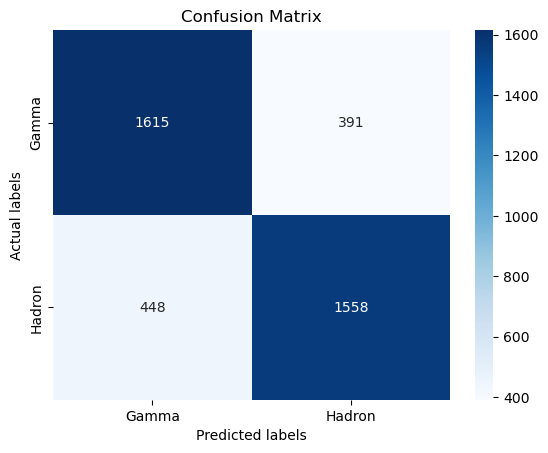

In [19]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,fmt='g',ax=ax,cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Gamma', 'Hadron']); ax.yaxis.set_ticklabels(['Gamma', 'Hadron']);


## AdaBoost Classifier
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

tunable parameters: ```n_estimators```

```n_estimators```: The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early. 

## Hyperparameter tuning

In [20]:
import time
# possible values of n_estimators
n_trees = np.linspace(100,500,10,dtype=int)
avg_accuracies = []
for n in n_trees:
    adaboost = AdaBoostClassifier(n_estimators = n)
    t1 = time.time()
    acc_score = cross_validation(X_train,y_train,adaboost,cv=10)
    t2 = time.time() - t1
    print(f"n = {n}\taverage accuracy = {acc_score}\ttime = {t2}")
    avg_accuracies.append(acc_score)
    

n = 100	average accuracy = 0.8221931468863165	time = 10.614821434020996
n = 144	average accuracy = 0.8212330906968047	time = 15.230633735656738
n = 188	average accuracy = 0.8237942287168541	time = 19.895525217056274
n = 233	average accuracy = 0.8224063660162912	time = 24.690342903137207
n = 277	average accuracy = 0.8218729761285791	time = 29.395816326141357
n = 322	average accuracy = 0.8217659104798912	time = 34.204378604888916
n = 366	average accuracy = 0.8221928048235412	time = 39.30795097351074
n = 411	average accuracy = 0.8229395278621532	time = 46.42223405838013
n = 455	average accuracy = 0.823367334373204	time = 52.46410298347473
n = 500	average accuracy = 0.8216582747265779	time = 54.33817172050476


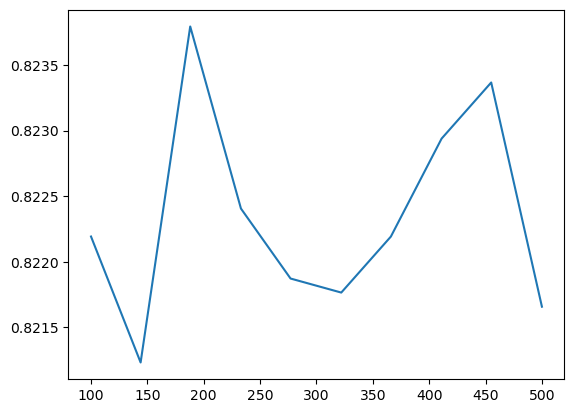

In [22]:
plt.plot(n_trees,np.array(avg_accuracies))
plt.show()

In [23]:
n_trees = np.linspace(150,250,20,dtype=int)
avg_accuracies = []
for n in n_trees:
    adaboost = AdaBoostClassifier(n_estimators = n)
    t1 = time.time()
    acc_score = cross_validation(X_train,y_train,adaboost,cv=10)
    t2 = time.time() - t1
    print(f"n = {n}\taverage accuracy = {acc_score}\ttime = {t2}")
    avg_accuracies.append(acc_score)
    

n = 150	average accuracy = 0.8220874494887301	time = 16.025478839874268
n = 155	average accuracy = 0.8229414662178802	time = 16.452531814575195
n = 160	average accuracy = 0.8252899552125805	time = 17.001068592071533
n = 165	average accuracy = 0.8250765080407556	time = 17.56627869606018
n = 171	average accuracy = 0.8257176477027064	time = 18.1414852142334
n = 176	average accuracy = 0.8231535451386037	time = 18.66496992111206
n = 181	average accuracy = 0.823580667524104	time = 19.3525652885437
n = 186	average accuracy = 0.824007675888679	time = 19.782296180725098
n = 192	average accuracy = 0.8241141714327413	time = 20.394627332687378
n = 197	average accuracy = 0.8235804394822537	time = 21.102035999298096
n = 202	average accuracy = 0.8231536591595289	time = 21.463186979293823
n = 207	average accuracy = 0.8233673343732042	time = 21.96934413909912
n = 213	average accuracy = 0.8233673343732042	time = 22.6165874004364
n = 218	average accuracy = 0.8233669923104289	time = 23.104921579360962
n =

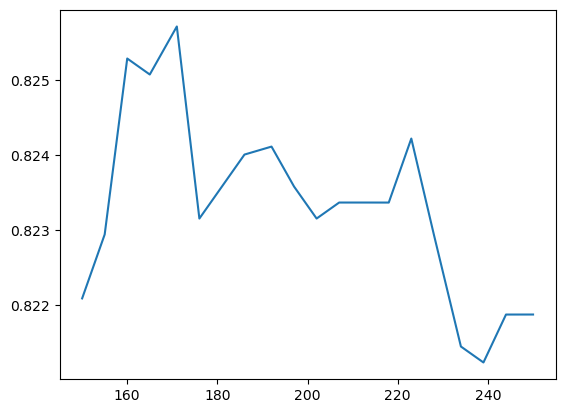

In [24]:
plt.plot(n_trees,np.array(avg_accuracies))
plt.show()

In [35]:
n_trees = np.append(np.arange(160,180,2), np.arange(210,230,2))
avg_accuracies = []
for n in n_trees:
    adaboost = AdaBoostClassifier(n_estimators = n)
    t1 = time.time()
    acc_score = cross_validation(X_train,y_train,adaboost,cv=10)
    t2 = time.time() - t1
    print(f"n = {n}\taverage accuracy = {acc_score}\ttime = {t2}")
    avg_accuracies.append(acc_score)
    

n = 160	average accuracy = 0.8252899552125805	time = 20.920289039611816
n = 162	average accuracy = 0.8257169635771557	time = 22.278916835784912
n = 164	average accuracy = 0.825503744447181	time = 20.267263412475586
n = 166	average accuracy = 0.8248630608689306	time = 24.5304536819458
n = 168	average accuracy = 0.8246498417389561	time = 25.378095626831055
n = 170	average accuracy = 0.8250767360826059	time = 27.45654058456421
n = 172	average accuracy = 0.8249700124966933	time = 32.40224051475525
n = 174	average accuracy = 0.8257169635771557	time = 32.43246912956238
n = 176	average accuracy = 0.8231535451386037	time = 27.431811571121216
n = 178	average accuracy = 0.8231538872013792	time = 29.31094717979431
n = 210	average accuracy = 0.8227264227531036	time = 33.8264045715332
n = 212	average accuracy = 0.8225129755812786	time = 34.81118130683899
n = 214	average accuracy = 0.8225128615603534	time = 35.082154273986816
n = 216	average accuracy = 0.8217652263543405	time = 37.366798400878906
n 

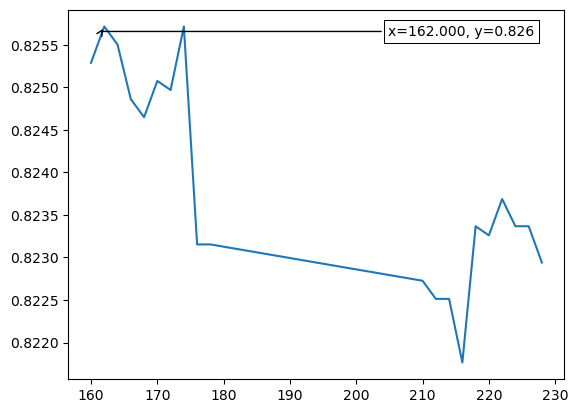

In [36]:
plt.plot(n_trees,np.array(avg_accuracies))

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(n_trees,np.array(avg_accuracies))
plt.show()

```Best n_estimators value: ~162```

## Hyperparameter tuning using Randomized Search

In [23]:
'''from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
grid = dict()
grid['n_estimators'] = [100, 200, 211,300]
grid['learning_rate'] = [0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = RandomizedSearchCV(estimator=AdaBoostClassifier(), param_distributions=grid, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))'''

'from sklearn.model_selection import RepeatedStratifiedKFold\nfrom sklearn.model_selection import RandomizedSearchCV\ngrid = dict()\ngrid[\'n_estimators\'] = [100, 200, 211,300]\ngrid[\'learning_rate\'] = [0.001, 0.01, 0.1, 1.0]\n# define the evaluation procedure\ncv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)\n# define the grid search procedure\ngrid_search = RandomizedSearchCV(estimator=AdaBoostClassifier(), param_distributions=grid, cv=cv, scoring=\'accuracy\')\n# execute the grid search\ngrid_result = grid_search.fit(X_train, y_train)\n# summarize the best score and configuration\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))'

## Testing Adaboost Classifier

In [37]:
adaboost = AdaBoostClassifier(n_estimators=162)
y_pred = train_model(X_train,X_test,y_train,adaboost)
evaluate("Adaboost",y_pred,y_test)

Adaboost accuracy: 0.8267696909272183
Adaboost f1 score: 0.8264669163545567
Adaboost precision: 0.8279139569784892
Adaboost recall: 0.825024925224327


/tmp/ipykernel_103467/1172794529.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_df = comparison_df.append(entry)


[[1662  344]
 [ 351 1655]]


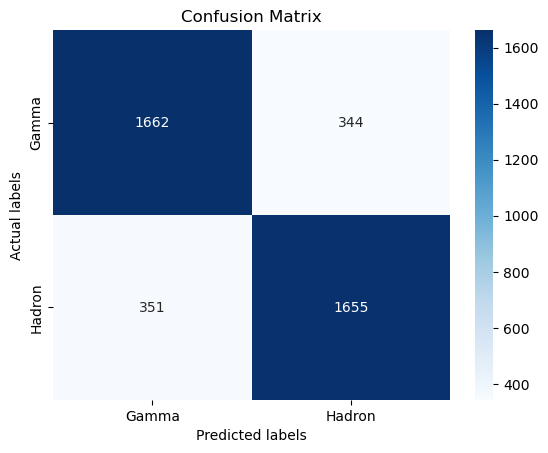

In [38]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,fmt='g',ax=ax,cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Gamma', 'Hadron']); ax.yaxis.set_ticklabels(['Gamma', 'Hadron']);


## K-Nearest Neighbors (K-NN)

tunable parameters: ```n_neighbors```

## Hyperparameter tuning

In [39]:
k_neighbors = np.arange(5,100,2)
avg_accuracies = []
for k in k_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    t1 = time.time()
    acc_score = cross_validation(X_train,y_train,knn,cv=10)
    t2 = time.time() - t1
    print(f"k = {k}\taverage accuracy = {acc_score}\ttime = {t2}")
    avg_accuracies.append(acc_score)
    

k = 5	average accuracy = 0.8036102445520802	time = 0.9275436401367188
k = 7	average accuracy = 0.8073481925402952	time = 0.8415946960449219
k = 9	average accuracy = 0.8083120114203359	time = 0.8044657707214355
k = 11	average accuracy = 0.8079916126207483	time = 0.9410521984100342
k = 13	average accuracy = 0.8090591905426484	time = 0.9799323081970215
k = 15	average accuracy = 0.8117272801904605	time = 0.9461812973022461
k = 17	average accuracy = 0.811940271278585	time = 1.0473792552947998
k = 19	average accuracy = 0.8108725793357596	time = 1.0845611095428467
k = 21	average accuracy = 0.808844375119722	time = 1.0808305740356445
k = 23	average accuracy = 0.8082022092694452	time = 1.1431636810302734
k = 25	average accuracy = 0.8057466546260569	time = 1.0238127708435059
k = 27	average accuracy = 0.8065996451668811	time = 1.022817850112915
k = 29	average accuracy = 0.8062792463672933	time = 1.0328309535980225
k = 31	average accuracy = 0.8048913836667306	time = 1.0972936153411865
k = 33	avera

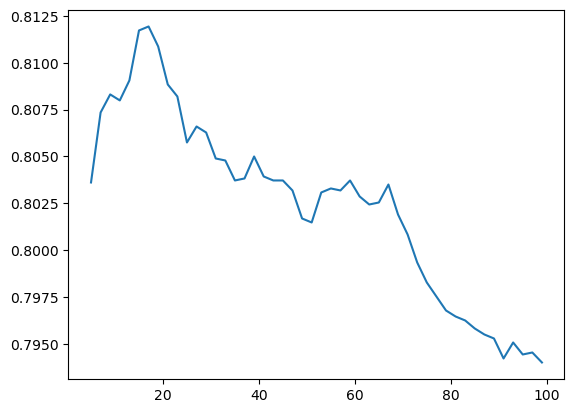

In [40]:
plt.plot(k_neighbors,np.array(avg_accuracies))
plt.show()

In [41]:
k_neighbors = np.arange(5,35,1)
avg_accuracies = []
for k in k_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    t1 = time.time()
    acc_score = cross_validation(X_train,y_train,knn,cv=10)
    t2 = time.time() - t1
    print(f"k = {k}\taverage accuracy = {acc_score}\ttime = {t2}")
    avg_accuracies.append(acc_score)
    

k = 5	average accuracy = 0.8036102445520802	time = 0.8367834091186523
k = 6	average accuracy = 0.794319705552363	time = 0.9571902751922607
k = 7	average accuracy = 0.8073481925402952	time = 0.9600963592529297
k = 8	average accuracy = 0.800088252196043	time = 0.8641960620880127
k = 9	average accuracy = 0.8083120114203359	time = 0.8481636047363281
k = 10	average accuracy = 0.8022234080398436	time = 0.9617252349853516
k = 11	average accuracy = 0.8079916126207483	time = 1.0233728885650635
k = 12	average accuracy = 0.8060689917813717	time = 0.9200780391693115
k = 13	average accuracy = 0.8090591905426484	time = 1.0408422946929932
k = 14	average accuracy = 0.8051068832152076	time = 1.063035011291504
k = 15	average accuracy = 0.8117272801904605	time = 1.0479013919830322
k = 16	average accuracy = 0.8089509846847092	time = 1.0557396411895752
k = 17	average accuracy = 0.811940271278585	time = 1.012247085571289
k = 18	average accuracy = 0.8074556002517582	time = 1.1496648788452148
k = 19	average a

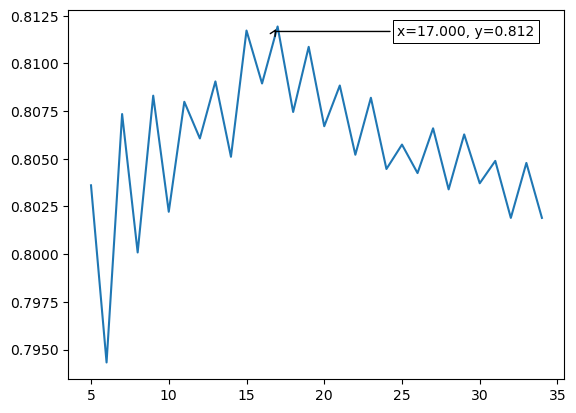

In [42]:
plt.plot(k_neighbors,np.array(avg_accuracies))
annot_max(k_neighbors,np.array(avg_accuracies))
plt.show()

## Testing KNN Classifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=17)
y_pred = train_model(X_train,X_test,y_train,knn)
evaluate("KNN",y_pred,y_test)

KNN accuracy: 0.8103190428713859
KNN f1 score: 0.7971207677952545
KNN precision: 0.8567335243553008
KNN recall: 0.7452642073778664


/tmp/ipykernel_103467/1172794529.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_df = comparison_df.append(entry)


[[1756  250]
 [ 511 1495]]


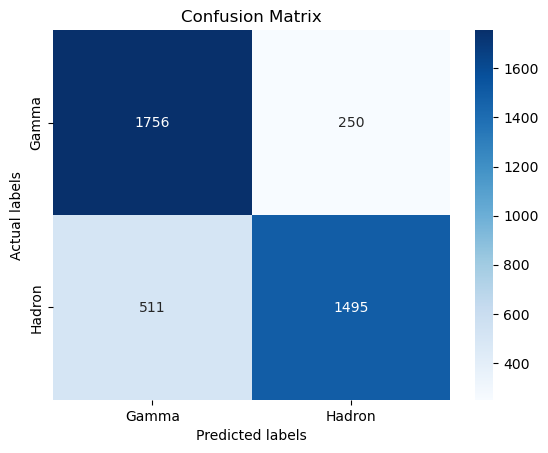

In [44]:
    cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,fmt='g',ax=ax,cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Gamma', 'Hadron']); ax.yaxis.set_ticklabels(['Gamma', 'Hadron']);


## Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

tunable parameters: ```n_estimators```

```n_estimators```: The number of trees in the forest.


## Hyperparameter tuning

In [45]:
n_estimators = np.linspace(50,300,20,dtype=int)
avg_accuracies = []
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n)
    t1 = time.time()
    acc_score = cross_validation(X_train,y_train,rf,cv=10)
    t2 = time.time() - t1
    print(f"n = {n}\taverage accuracy = {acc_score}\ttime = {t2}")
    avg_accuracies.append(acc_score)
    

n = 50	average accuracy = 0.8546554743726569	time = 14.546619415283203
n = 63	average accuracy = 0.8533742212370814	time = 18.63932204246521
n = 76	average accuracy = 0.8547642503352215	time = 22.82245397567749
n = 89	average accuracy = 0.8529476689562067	time = 26.597578048706055
n = 102	average accuracy = 0.852735590035483	time = 29.100209712982178
n = 115	average accuracy = 0.8547636802305959	time = 30.842748403549194
n = 128	average accuracy = 0.8567916564047833	time = 34.293354511260986
n = 142	average accuracy = 0.8550833949046328	time = 38.108360052108765
n = 155	average accuracy = 0.8578606025777852	time = 41.908435583114624
n = 168	average accuracy = 0.8538020277481323	time = 45.20749306678772
n = 181	average accuracy = 0.8546560444772824	time = 48.60418939590454
n = 194	average accuracy = 0.8570068138904849	time = 52.40931987762451
n = 207	average accuracy = 0.8558319422780469	time = 59.73830986022949
n = 221	average accuracy = 0.857005673681234	time = 59.9186155796051
n = 23

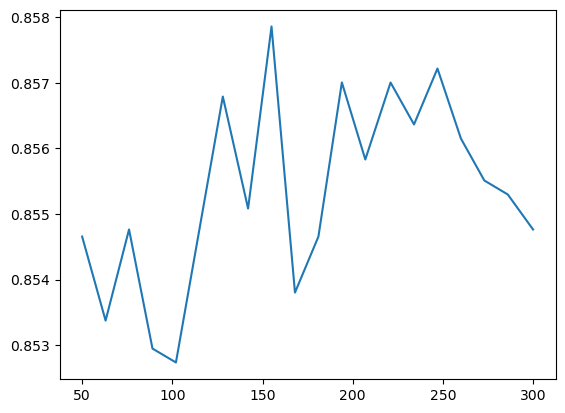

In [46]:
plt.plot(n_estimators,np.array(avg_accuracies))
plt.show()

In [47]:
n_estimators = np.linspace(125,160,10,dtype=int)
avg_accuracies = []
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n)
    t1 = time.time()
    acc_score = cross_validation(X_train,y_train,rf,cv=10)
    t2 = time.time() - t1
    print(f"n = {n}\taverage accuracy = {acc_score}\ttime = {t2}")
    avg_accuracies.append(acc_score)
    

n = 125	average accuracy = 0.8547644783770716	time = 32.737011432647705
n = 128	average accuracy = 0.8561508588056078	time = 32.50386452674866
n = 132	average accuracy = 0.8548707458792839	time = 34.80695652961731
n = 136	average accuracy = 0.8522000337501938	time = 35.76816487312317
n = 140	average accuracy = 0.8544441935984091	time = 38.21756052970886
n = 144	average accuracy = 0.8563655602076092	time = 42.68096613883972
n = 148	average accuracy = 0.8538029399155332	time = 44.07245111465454
n = 152	average accuracy = 0.8542298342591833	time = 41.50951528549194
n = 156	average accuracy = 0.854657640770234	time = 42.76413345336914
n = 160	average accuracy = 0.8559387798848844	time = 45.390727519989014


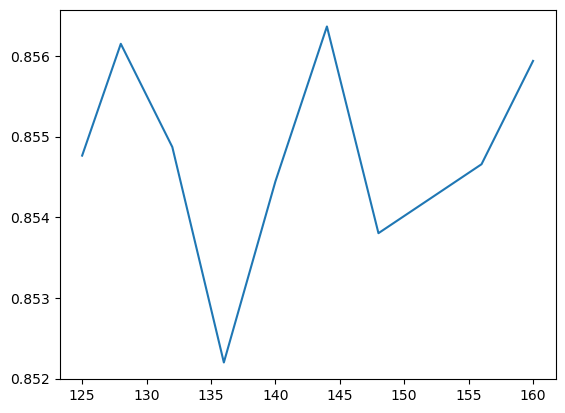

In [48]:
plt.plot(n_estimators,np.array(avg_accuracies))
plt.show()

In [49]:
n_estimators = np.linspace(140,145,5,dtype=int)
avg_accuracies = []
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n)
    t1 = time.time()
    acc_score = cross_validation(X_train,y_train,rf,cv=10)
    t2 = time.time() - t1
    print(f"n = {n}\taverage accuracy = {acc_score}\ttime = {t2}")
    avg_accuracies.append(acc_score)
    

n = 140	average accuracy = 0.8531625984000583	time = 37.9939911365509
n = 141	average accuracy = 0.8552982103275593	time = 40.81869029998779
n = 142	average accuracy = 0.8555108593529083	time = 39.429386138916016
n = 143	average accuracy = 0.8559375256547082	time = 38.95640182495117
n = 145	average accuracy = 0.854655702414507	time = 40.980098724365234


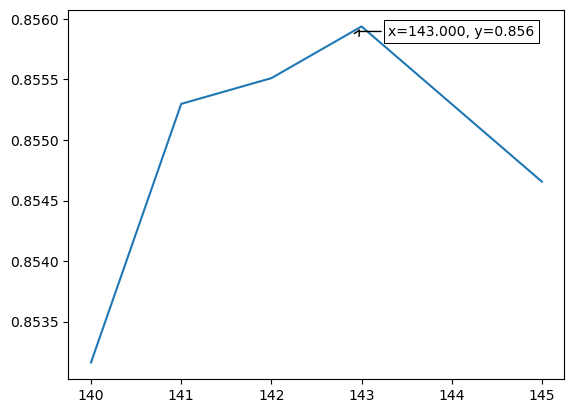

In [50]:
plt.plot(n_estimators,np.array(avg_accuracies))
annot_max(n_estimators,np.array(avg_accuracies))
plt.show()

```best n_estimators value: ~143```

## Testing Random Forest Classifier

In [51]:
rf = RandomForestClassifier(n_estimators=143)
y_pred = train_model(X_train,X_test,y_train,rf)
evaluate("Random Forest",y_pred,y_test)

Random Forest accuracy: 0.8579262213359921
Random Forest f1 score: 0.854368932038835
Random Forest precision: 0.8763102725366876
Random Forest recall: 0.8334995014955134


/tmp/ipykernel_103467/1172794529.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_df = comparison_df.append(entry)


[[1770  236]
 [ 334 1672]]


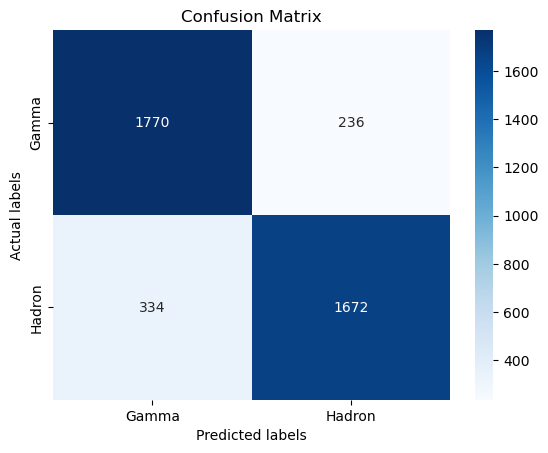

In [52]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,fmt='g',ax=ax,cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Gamma', 'Hadron']); ax.yaxis.set_ticklabels(['Gamma', 'Hadron']);

## Naïve  Bayes
Tunable parameters: None

## Choosing ```var_smoothing``` parameter
```var_smoothing```: Portion of the largest variance of all features that is added to variances for calculation stability.

In [65]:
var_smoothing = np.logspace(0,-9, num=10)
avg_accuracies = []
for v in var_smoothing:
    nb = GaussianNB(var_smoothing=v)
    t1 = time.time()
    acc_score = cross_validation(X_train,y_train,nb,cv=10)
    t2 = time.time() - t1
    print(f"v = {v}\taverage accuracy = {acc_score}\ttime = {t2}")
    avg_accuracies.append(acc_score)
    

v = 1.0	average accuracy = 0.6869899844019376	time = 0.03683900833129883
v = 0.1	average accuracy = 0.6889132893668646	time = 0.03198528289794922
v = 0.01	average accuracy = 0.6598669147761999	time = 0.025300979614257812
v = 0.001	average accuracy = 0.651217173375658	time = 0.0256803035736084
v = 0.0001	average accuracy = 0.650790279032008	time = 0.025053977966308594
v = 1e-05	average accuracy = 0.6506836694670207	time = 0.03178143501281738
v = 1e-06	average accuracy = 0.6506836694670207	time = 0.03455042839050293
v = 1e-07	average accuracy = 0.6506836694670207	time = 0.03821539878845215
v = 1e-08	average accuracy = 0.6506836694670207	time = 0.036772727966308594
v = 1e-09	average accuracy = 0.6506836694670207	time = 0.034073829650878906


Best ```var_smoothing``` value: ~0.1

## Feature Selection

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
def feature_select(X_train,y_train):
    n_samples = X_train.shape[0]
    for i in range(1,X.shape[1]+1):
        select = SelectKBest(k=i, score_func=chi2)
        select.fit(X_train, y_train)
        X_new = select.transform(X_train)
        acc_score = cross_validation(X_new,y_train,GaussianNB(var_smoothing=0.1),cv=10)
        print(f"no. of features= {i}\taverage accuracy = {acc_score}")
        avg_accuracies.append(acc_score)
        
    

In [55]:
feature_select(X_train,y_train)

no. of features= 1	average accuracy = 0.7047201242371999
no. of features= 2	average accuracy = 0.7367549872752648
no. of features= 3	average accuracy = 0.723832083663994
no. of features= 4	average accuracy = 0.7236181804084686
no. of features= 5	average accuracy = 0.7129420591266908
no. of features= 6	average accuracy = 0.7108070173038156
no. of features= 7	average accuracy = 0.70140895657171
no. of features= 8	average accuracy = 0.6986320909613333
no. of features= 9	average accuracy = 0.6968163077287943
no. of features= 10	average accuracy = 0.6889132893668646


The best 2 features yield max accuracy

## Testing Naive Bayes Classifier

In [56]:
select = SelectKBest(k=2, score_func=chi2)
select.fit(X_train, y_train)
X_new = select.transform(X_train)
X_test_new = select.transform(X_test)
y_pred = train_model(X_new,X_test_new,y_train,GaussianNB(var_smoothing=0.1))
evaluate("Naive Bayes",y_pred,y_test)

Naive Bayes accuracy: 0.7395314057826521
Naive Bayes f1 score: 0.6992805755395683
Naive Bayes precision: 0.8270932607215793
Naive Bayes recall: 0.6056829511465603


/tmp/ipykernel_103467/1172794529.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_df = comparison_df.append(entry)


[[1752  254]
 [ 791 1215]]


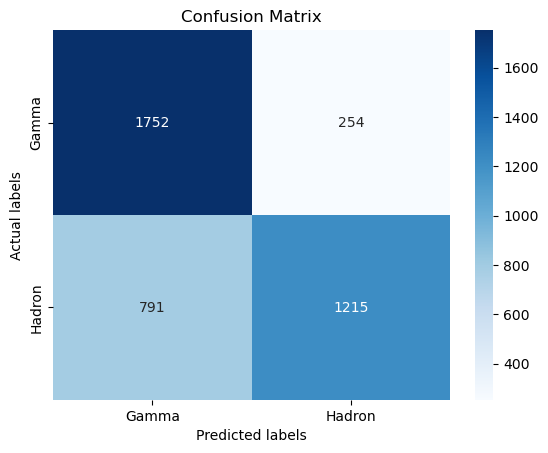

In [57]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,fmt='g',ax=ax,cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Gamma', 'Hadron']); ax.yaxis.set_ticklabels(['Gamma', 'Hadron']);

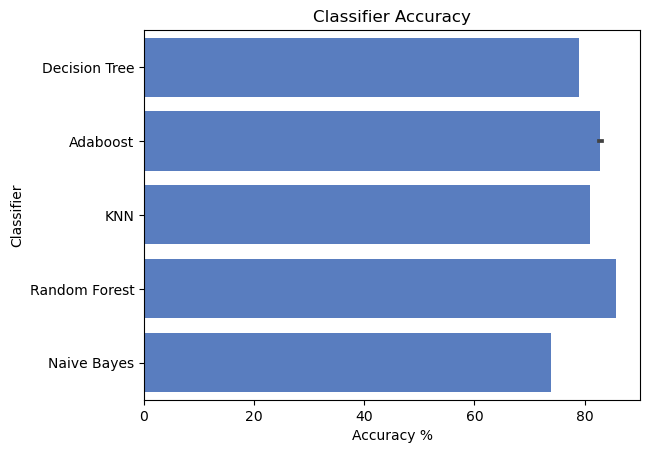

In [58]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=comparison_df, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

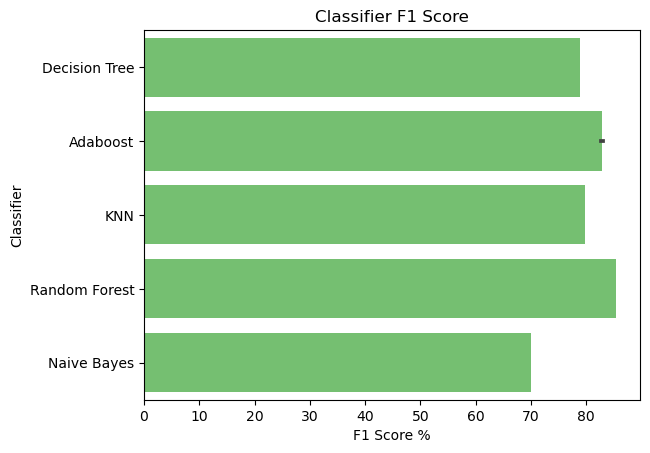

In [59]:
sns.set_color_codes("muted")
sns.barplot(x='F1 score', y='Classifier', data=comparison_df, color="g")

plt.xlabel('F1 Score %')
plt.title('Classifier F1 Score')
plt.show()

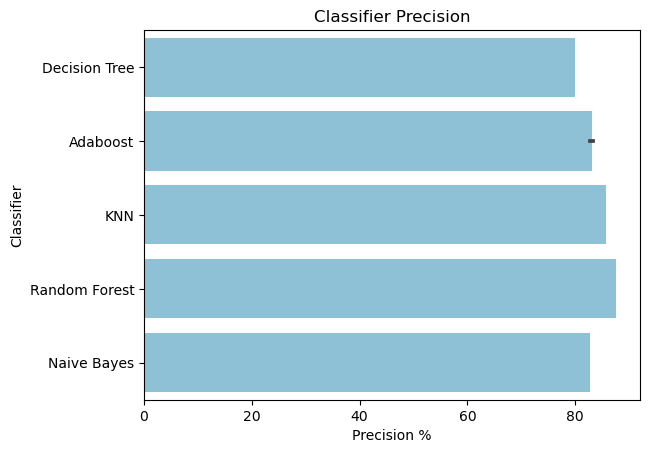

In [60]:
sns.set_color_codes("muted")
sns.barplot(x='Precision', y='Classifier', data=comparison_df, color="c")

plt.xlabel('Precision %')
plt.title('Classifier Precision')
plt.show()

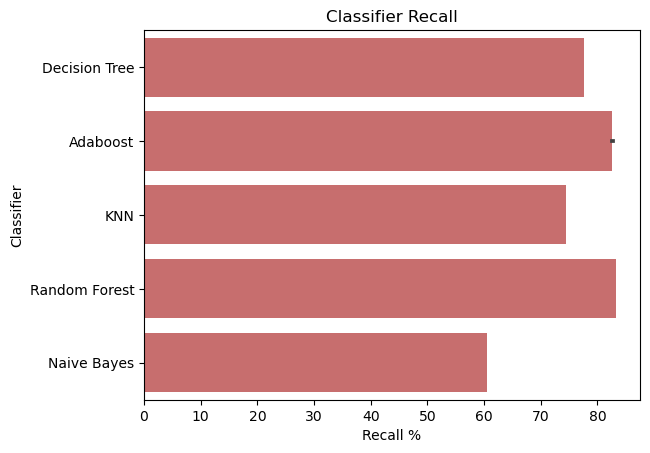

In [61]:
sns.set_color_codes("muted")
sns.barplot(x='Recall', y='Classifier', data=comparison_df, color="r")

plt.xlabel('Recall %')
plt.title('Classifier Recall')
plt.show()